## **Notebook EC#10**
## Causal inference using a Bayesian network built from a "mysterious dataset".
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Túlio Queiroz de Paula<br>


#### **Please, make the upload of the dataset [dados_EC10.txt] before executing the code.**

In [2]:
import pyAgrum as gum
import pandas as pd
import pyAgrum.lib.notebook as gnb

In [3]:
columns = ["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9"]
df = pd.read_csv("data/dados_EC10.txt", header=None, names=columns)
print(df)

      C1  C2  C3  C4  C5  C6  C7  C8  C9
0      2   7   2   1   2   2   1   1   2
1      1   4   2   2   2   2   2   2   2
2      2   1   2   1   2   2   2   2   1
3      2   6   2   1   2   2   1   1   2
4      2   4   1   2   2   2   1   1   2
...   ..  ..  ..  ..  ..  ..  ..  ..  ..
9995   1   3   1   2   2   2   1   2   2
9996   2   7   2   1   2   2   1   2   1
9997   1   5   1   1   2   2   2   2   2
9998   2   5   1   2   2   2   2   1   2
9999   1   1   1   2   2   1   2   2   2

[10000 rows x 9 columns]


In [18]:
df.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,1.498600,4.034200,1.487700,1.272200,1.851900,1.801200,1.497200,1.518000,1.49780
std,0.500023,2.002207,0.499874,0.445115,0.355217,0.399117,0.500017,0.499701,0.50002
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.00000
50%,1.000000,4.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.00000
75%,2.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000
max,2.000000,7.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000


In [4]:
learner = gum.BNLearner(df)
learner.useGreedyHillClimbing()
bn = learner.learnBN()
gnb.sideBySide(bn,gnb.getInference(bn))
gnb.sideBySide(*[bn.cpt(i) for i in bn.nodes()])

In [5]:
gum.MarkovBlanket(bn,'C5')

<pyAgrum.pyAgrum.MarkovBlanket; proxy of <Swig Object of type 'gum::MarkovBlanket *' at 0x79c9829045d0> >

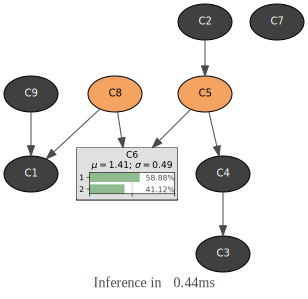

In [6]:
gnb.showInference(bn,evs={"C5":0, "C8":1},targets={"C6"},size="10")

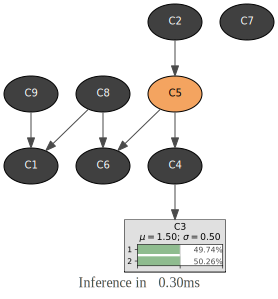

In [28]:
gnb.showInference(bn,evs={"C5":1},targets={"C3"},size="10")

<font color="green">
Atividade (a) <br>
Procure justificar conceitualmente por que a variável C7 não possui conexões a outros nós.
</font>

Resposta:<br><br>
Os arcos que ligam os nós indicam uma dependência condicional entre eles. Como C7 não possui nenhuma conexão, conclui-se que não há nenhuma relação de dependencia condicional entre C7 e as demais variáveis.

<font color="green">
Atividade (b) <br>
O que representa o Markov Blanket associado à variável C5?
</font>

Resposta:<br><br>
Markov Blanket de um nó X é o conjunto de nós MB(X) tal que X é independente dos demais nós, dado MB(X)\*.
<br>Ou seja, em MB(C5) temos todos os nós que podem influenciar na variável C5. Os demais nós fora de MB(C5) não interferem em C5. Assim, P(C5∣MB(C5),X)=P(C5∣MB(C5)), sendo X é uma variável qualquer fora de MB(C5). Isso é muito útil à medida que podemos reduzir significativamente a quantidade de variáveis a serem analizadas quando se deseja obter alguma informação sobre C5. <br><br>
<i>* [pyAgrum Docs - Markov Blanket](https://pyagrum.readthedocs.io/en/1.10.0/notebooks/01-Tutorial.html#Markov-Blanket)</i>

<font color="green">
Atividade (c) <br>
Qual é a probabilidade da variável C5 ser verdade? No caso de variáveis binárias, 1 é falso e 2 é verdade. Obtenha a resposta diretamente das tabelas de probabilidades.
</font>

Resposta:<br><br>
85.19%

<font color="green">
Atividade (d) <br>
Qual é a probabilidade da variável C6 ser verdade dado que C5 é falso e C8 é verdade? Aqui é possível obter o resultado diretamente das tabelas de probabilidades ou executando o comando da última célula de código do notebook.
</font>

Resposta:<br><br>
41.12%

<font color="green">
Atividade (e) <br>
Crie uma nova célula de código para o notebook, copie e adapte o código da última célula disponibilizada logo acima e responda: Qual é a probabilidade da variável C3 ser verdade, dado que C5 é verdade?
</font>

Resposta:<br> <br>
50.26%